In [9]:
import requests
from csv import DictReader
DATA_URL = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv'
print("Downloading", DATA_URL)
resp = requests.get(DATA_URL)
quakes = list(DictReader(resp.text.splitlines()))
# ...avoiding numpy/pandas Array() for now, and can't care enough to do this less awkwardly...
lon = [float(q['longitude']) for q in quakes]
lat = [float(q['latitude']) for q in quakes]
mags = [2 ** float(q['mag']) for q in quakes]

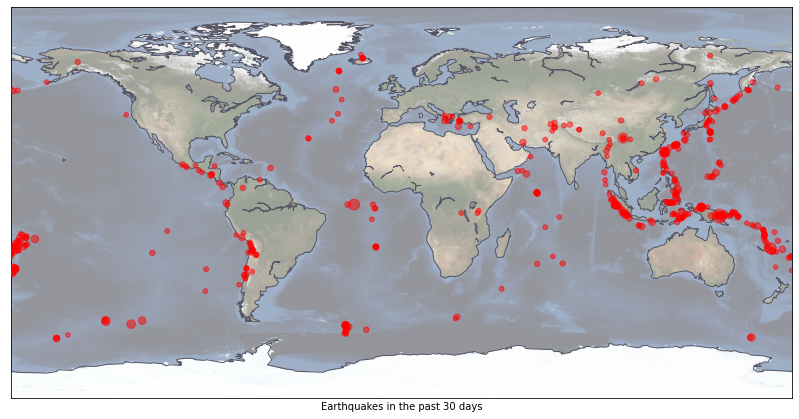

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(14, 8))
earth = Basemap()
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)
plt.scatter(lon, lat, mags, c='red',alpha=0.5, zorder=10)
plt.xlabel("Earthquakes in the past 30 days")
plt.savefig('usgs-4.5quakes-bluemarble.png', dpi=350)

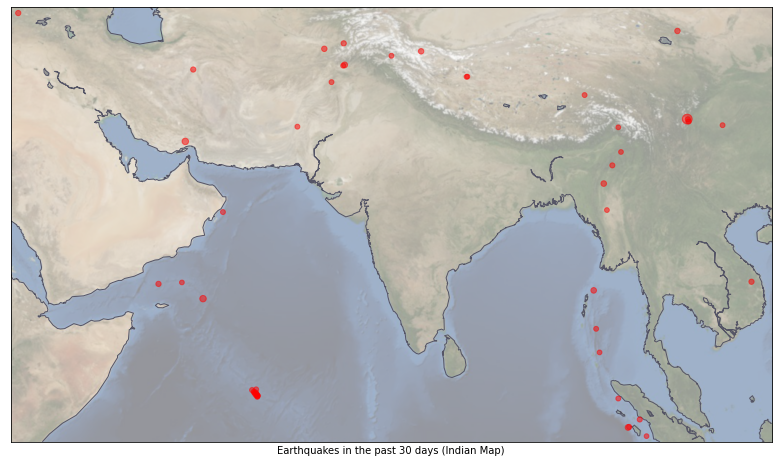

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(14, 8))
earth = Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
earth.bluemarble(alpha=0.42)
earth.drawcoastlines(color='#555566', linewidth=1)
plt.scatter(lon, lat, mags,c='red',alpha=0.5, zorder=10)
plt.xlabel("Earthquakes in the past 30 days (Indian Map)")
plt.savefig('usgs-4.5quakes-bluemarble.png', dpi=350)